<a href="https://colab.research.google.com/github/MathieuForge/Moneyradar/blob/main/or_argent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
gold=pd.read_csv('gold_price.csv')
silver=pd.read_csv('silver_price.csv')
gold_suite=pd.read_csv('gold_suite.csv')
silver_suite=pd.read_csv('silver_suite.csv')

In [ ]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13461 entries, 0 to 13460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13461 non-null  object 
 1   price   13320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 210.5+ KB


In [ ]:
gold_suite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      885 non-null    object
 1   Price     885 non-null    object
 2   Open      885 non-null    object
 3   High      885 non-null    object
 4   Low       885 non-null    object
 5   Vol.      882 non-null    object
 6   Change %  885 non-null    object
dtypes: object(7)
memory usage: 48.5+ KB


In [ ]:
gold=pd.read_csv('gold_price.csv')
silver=pd.read_csv('silver_price.csv')
gold_suite=pd.read_csv('gold_suite.csv')
silver_suite=pd.read_csv('silver_suite.csv')


# Convertir les colonnes de date en format datetime
gold['date'] = pd.to_datetime(gold['date'], errors='coerce')
gold_suite['Date'] = pd.to_datetime(gold_suite['Date'], errors='coerce')

# Renommer les colonnes pour qu'elles correspondent
gold_suite.rename(columns={'Date': 'date', 'Price': 'price'}, inplace=True)

# Conserver uniquement la colonne 'price_suite' de gold_suite
gold_suite_reduced = gold_suite[['date', 'price']]

# Concaténer les DataFrames gold et gold_suite_reduced
concat_df = pd.concat([gold, gold_suite_reduced], ignore_index=True)

# Supprimer les doublons en conservant les valeurs de 'price' de 'gold' si des dates se chevauchent
gold = concat_df.sort_values(by='date').drop_duplicates(subset='date', keep='last')

# Afficher les premières lignes du DataFrame résultant pour vérifier
print(gold.tail())



# Convertir les colonnes de date en format datetime
silver['date'] = pd.to_datetime(silver['date'], errors='coerce')
silver_suite['Date'] = pd.to_datetime(silver_suite['Date'], errors='coerce')

# Renommer les colonnes pour qu'elles correspondent
silver_suite.rename(columns={'Date': 'date', 'Price': 'price'}, inplace=True)

# Conserver uniquement la colonne 'price_suite' de silver_suite
silver_suite_reduced = silver_suite[['date', 'price']]

# Concaténer les DataFrames silver et silver_suite_reduced
concat_silver_df = pd.concat([silver, silver_suite_reduced], ignore_index=True)

# Supprimer les doublons en conservant les valeurs de 'price' de 'silver' si des dates se chevauchent
silver = concat_silver_df.sort_values(by='date').drop_duplicates(subset='date', keep='last')

# Afficher les premières lignes du DataFrame résultant pour vérifier
print(silver.tail())


            date     price
13465 2024-09-04  2,526.00
13464 2024-09-05  2,543.10
13463 2024-09-06  2,524.60
13462 2024-09-09  2,532.70
13461 2024-09-10  2,535.85
            date   price
13479 2024-09-05  29.099
13478 2024-09-06  28.183
13477 2024-09-08  28.302
13476 2024-09-09  28.651
13475 2024-09-10  28.767


In [ ]:
silver.tail()

,date,price
13479,2024-09-05,29.099
13478,2024-09-06,28.183
13477,2024-09-08,28.302
13476,2024-09-09,28.651
13475,2024-09-10,28.767


In [ ]:
# Supposons que vos DataFrames s'appellent gold et silver
# Fusionner sur la colonne 'date' avec une jointure externe pour garder toutes les dates
df_merged = pd.merge(gold, silver, on='date', how='outer', suffixes=('_gold', '_silver'))

# Interpolation des valeurs manquantes pour chaque DataFrame
df_merged['price_gold'] = df_merged['price_gold'].interpolate()
df_merged['price_silver'] = df_merged['price_silver'].interpolate()

# Option : Vous pouvez aussi remplacer les valeurs manquantes par la moyenne si nécessaire
# df_merged['price_gold'].fillna(df_merged['price_gold'].mean(), inplace=True)
# df_merged['price_silver'].fillna(df_merged['price_silver'].mean(), inplace=True)

# Visualisation rapide du nombre de valeurs manquantes après traitement
missing_data = df_merged.isnull().sum()

print("Données manquantes après traitement :")
print(missing_data)

# Affichage des premières lignes pour vérification
print(df_merged.head())

Données manquantes après traitement :
date              0
price_gold      173
price_silver      0
dtype: int64
        date price_gold  price_silver
0 1968-01-02        NaN         2.173
1 1968-01-03        NaN         2.225
2 1968-01-04        NaN         2.171
3 1968-01-05        NaN         2.157
4 1968-01-08        NaN         2.163


<ipython-input-7-6557c8a9bc7d>:6: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged['price_gold'] = df_merged['price_gold'].interpolate()


In [ ]:
# Supposons que vos DataFrames s'appellent gold et silver
# Fusionner sur la colonne 'date' avec une jointure externe pour garder toutes les dates
df_merged = pd.merge(gold, silver, on='date', how='outer', suffixes=('_gold', '_silver'))

# Interpolation des valeurs manquantes pour chaque DataFrame
df_merged['price_gold'] = df_merged['price_gold'].interpolate()
df_merged['price_silver'] = df_merged['price_silver'].interpolate()

# Option : Vous pouvez aussi remplacer les valeurs manquantes par la moyenne si nécessaire
# df_merged['price_gold'].fillna(df_merged['price_gold'].mean(), inplace=True)
# df_merged['price_silver'].fillna(df_merged['price_silver'].mean(), inplace=True)

# Visualisation rapide du nombre de valeurs manquantes après traitement
missing_data = df_merged.isnull().sum()

print("Données manquantes après traitement :")
print(missing_data)

# Affichage des premières lignes pour vérification
print(df_merged.head())

Données manquantes après traitement :
date              0
price_gold      173
price_silver      0
dtype: int64
        date price_gold  price_silver
0 1968-01-02        NaN         2.173
1 1968-01-03        NaN         2.225
2 1968-01-04        NaN         2.171
3 1968-01-05        NaN         2.157
4 1968-01-08        NaN         2.163


<ipython-input-8-6557c8a9bc7d>:6: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged['price_gold'] = df_merged['price_gold'].interpolate()


In [ ]:
# Tri des données par date
df_merged = df_merged.sort_values(by='date').reset_index(drop=True)

df_merged.tail(30)

,date,price_gold,price_silver
14348,2024-08-02,"2,469.80",28.802
14349,2024-08-05,"2,444.40",27.596
14350,2024-08-06,"2,431.60",27.603
14351,2024-08-07,"2,432.40",27.331
14352,2024-08-08,"2,463.30",28.002
14353,2024-08-09,"2,473.40",27.982
14354,2024-08-12,"2,504.00",28.409
14355,2024-08-13,"2,507.80",28.188
14356,2024-08-14,"2,479.70",27.734
14357,2024-08-15,"2,492.40",28.828


<ipython-input-20-44c4e3200617>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)  # Remplir les NaN avec la dernière valeur connue
<ipython-input-20-44c4e3200617>:114: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, current_max_gold)


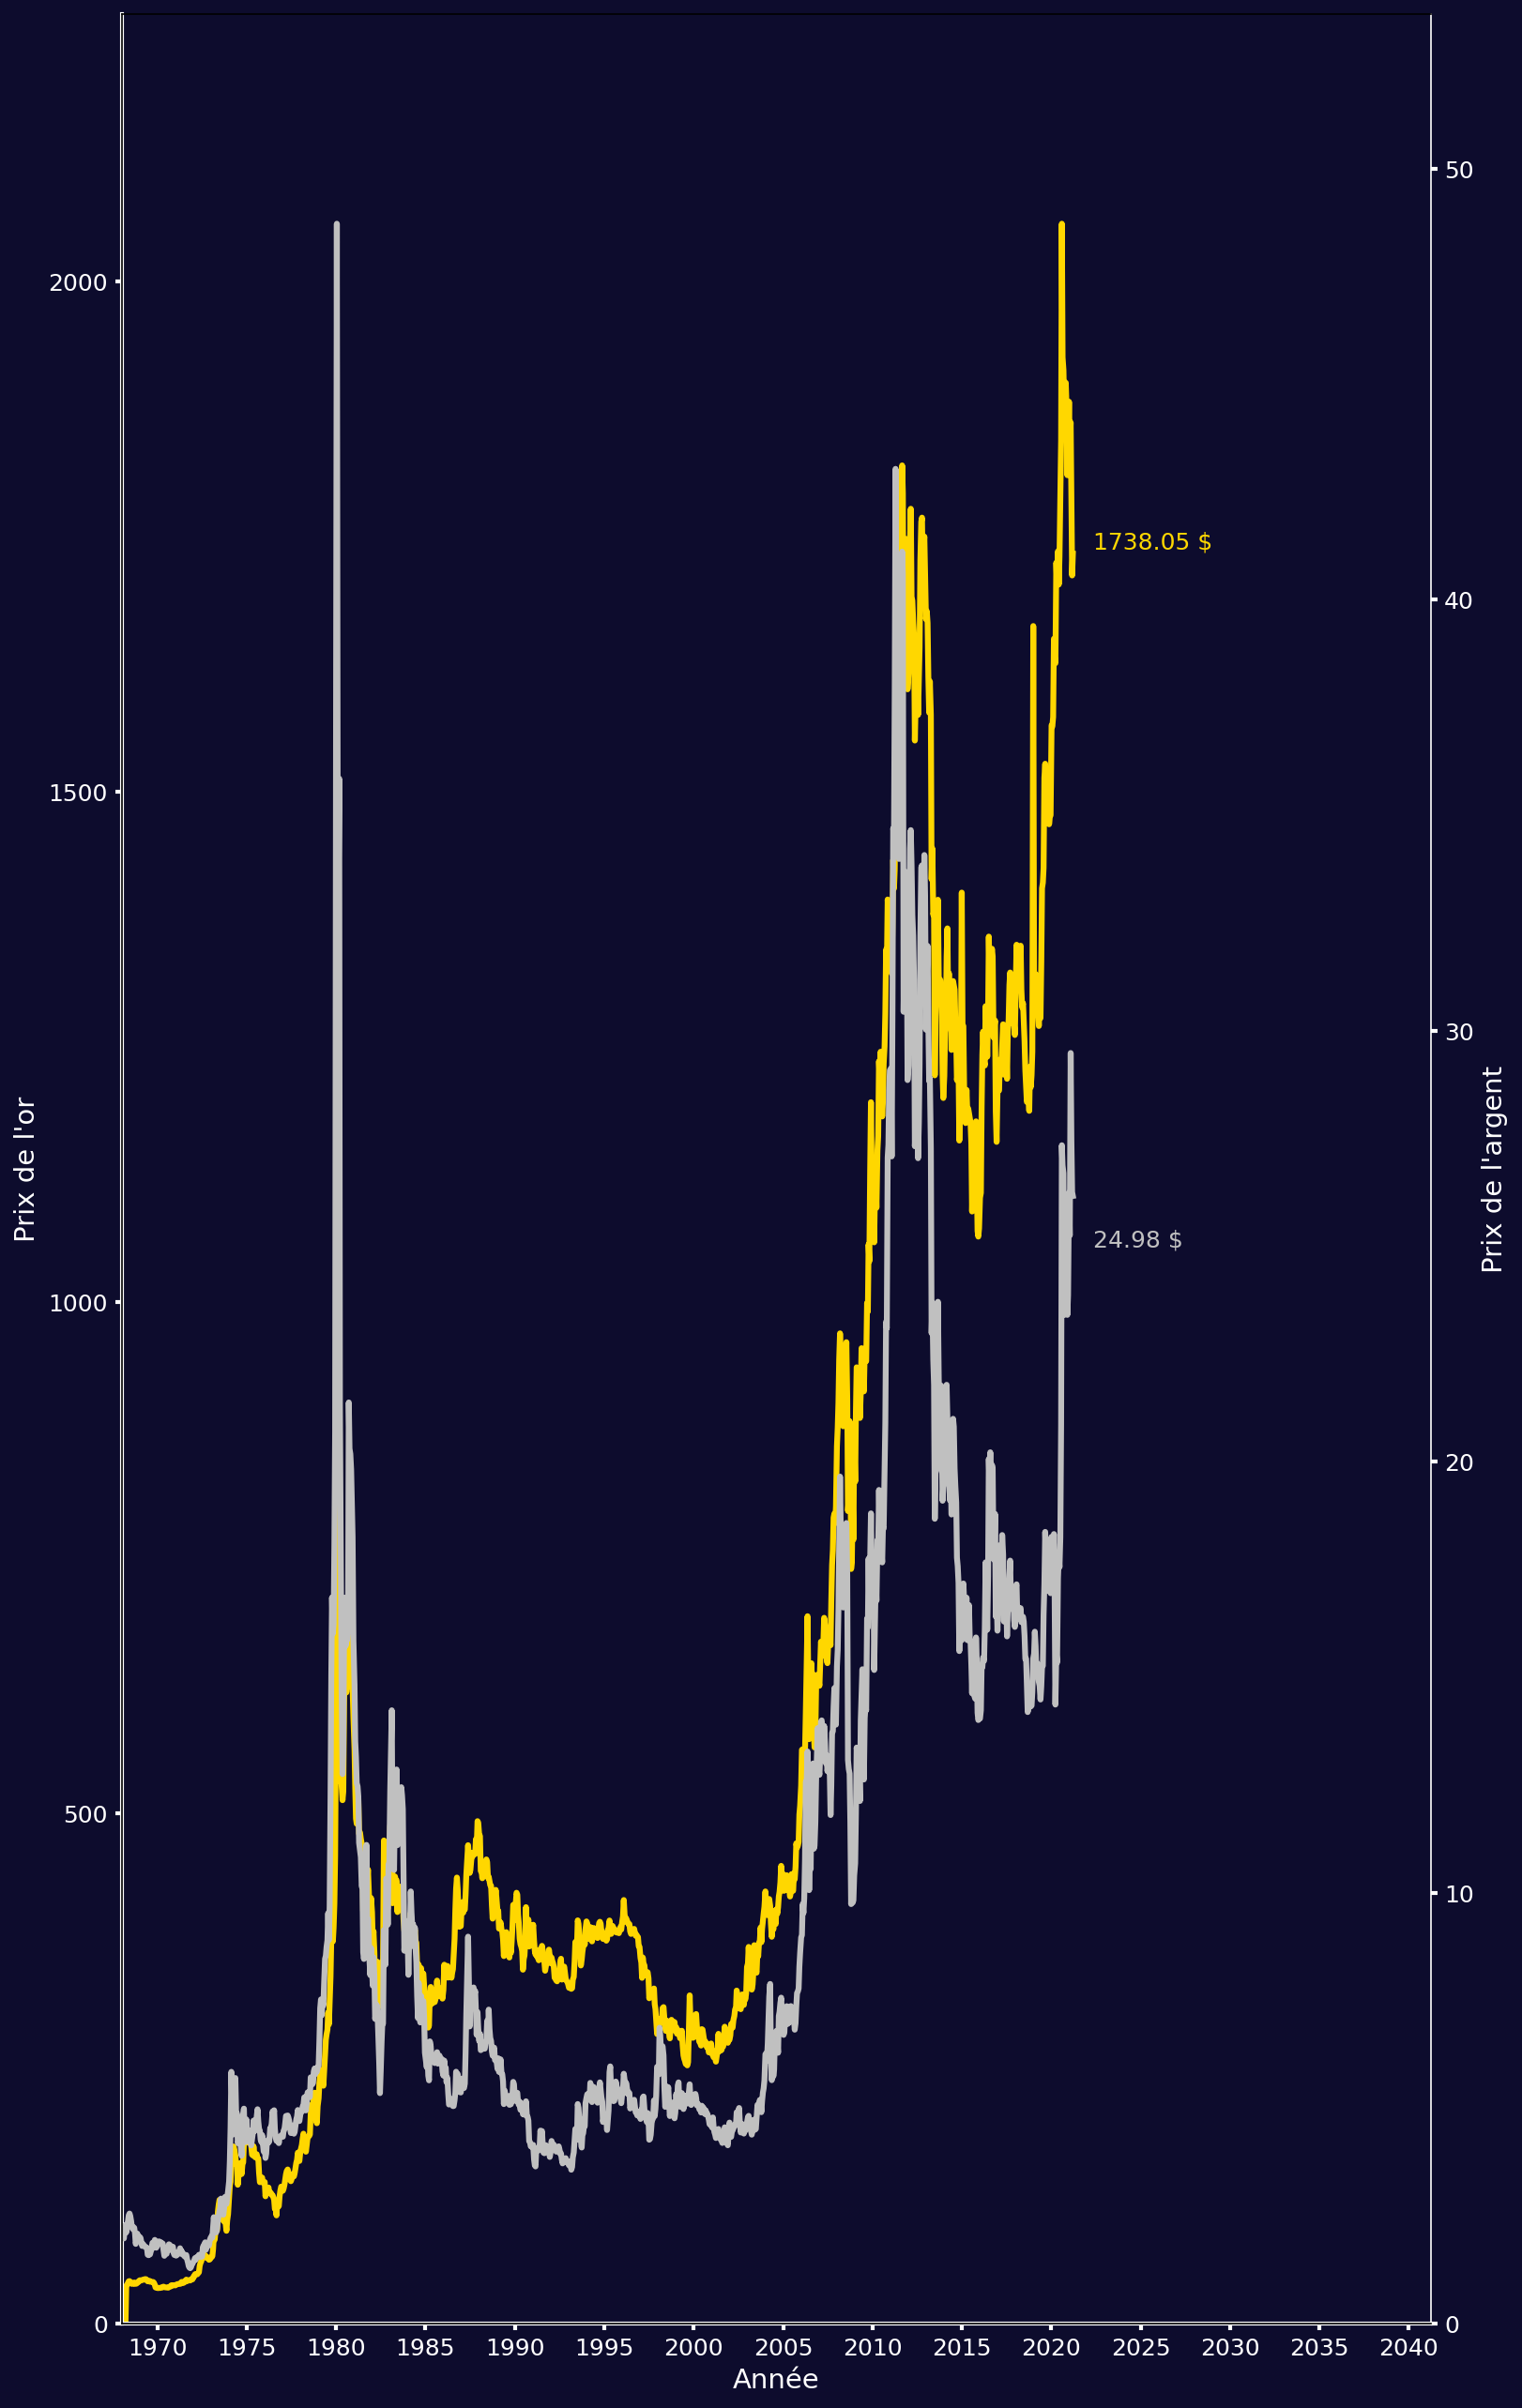

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Supposons que df_merged est déjà défini et contient les colonnes 'date', 'price_gold', et 'price_silver'

# Convertir la colonne 'date' en format datetime si ce n'est pas déjà fait
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

# Interpolation pour combler les valeurs manquantes après fusion
df_merged['price_gold'].interpolate(inplace=True)
df_merged['price_silver'].interpolate(inplace=True)

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_merged.fillna(method='ffill', inplace=True)  # Remplir les NaN avec la dernière valeur connue
df_merged.fillna(0, inplace=True)  # Si des NaN subsistent, les remplacer par 0

# Préparation des données pour l'interpolation et l'animation
x_data = df_merged['date'].values.astype('datetime64[D]')
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_interp_gold = np.interp(time_interp, np.arange(len(df_merged)), df_merged['price_gold'])
y_interp_silver = np.interp(time_interp, np.arange(len(df_merged)), df_merged['price_silver'])

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Couleurs de fond et des axes
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Ajouter un second axe y pour l'argent
ax2 = ax1.twinx()

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
color_gold = 'gold'
color_silver = 'silver'

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Axe 2 (pour l'argent)
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax2.yaxis.label.set_color('white')

# Lignes de données pour l'or et l'argent
line_gold, = ax1.plot([], [], label='Or', lw=3, color=color_gold)
line_silver, = ax2.plot([], [], label='Argent', lw=3, color=color_silver)

# Initialiser l'animation
def init():
    line_gold.set_data([], [])
    line_silver.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, y_interp_gold.max() * 1.1)
    ax2.set_ylim(0, y_interp_silver.max() * 1.1)
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Prix de l\'or', fontsize=14, color='white')
    ax2.set_ylabel('Prix de l\'argent', fontsize=14, color='white')
    return line_gold, line_silver

# Fonction de mise à jour de l'animation avec dézoom progressif
def update(frame):
    # Mise à jour des lignes
    line_gold.set_data(x_interp[:frame], y_interp_gold[:frame])
    line_silver.set_data(x_interp[:frame], y_interp_silver[:frame])

    # Dézoom progressif
    if frame > 0:
        current_max_gold = np.nanmax(y_interp_gold[:frame]) * 1.1
        current_max_silver = np.nanmax(y_interp_silver[:frame]) * 1.1
        ax1.set_ylim(0, current_max_gold)
        ax2.set_ylim(0, current_max_silver)

        # Ajuster la largeur des limites x en fonction du progrès de l'animation (dézoom progressif)
        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

    return line_gold, line_silver

# Ajouter les annotations dans la fonction 'update'
def update(frame):
    # Mise à jour des données des lignes
    line_gold.set_data(x_interp[:frame], y_interp_gold[:frame])
    line_silver.set_data(x_interp[:frame], y_interp_silver[:frame])

    # Mise à jour des limites de l'axe si la séquence n'est pas vide
    if frame > 0:
        current_max_gold = np.nanmax(y_interp_gold[:frame]) * 1.1
        current_max_silver = np.nanmax(y_interp_silver[:frame]) * 1.1
        ax1.set_ylim(0, current_max_gold)
        ax2.set_ylim(0, current_max_silver)

        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        # Suppression des annotations précédentes
        for ann in ax1.texts:
            ann.remove()
        for ann in ax2.texts:
            ann.remove()

        # Ajout des annotations pour l'or
        ann_gold = ax1.annotate(
            f"{y_interp_gold[frame]:.2f} $", (x_interp[frame], y_interp_gold[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_gold, fontsize=12
        )

        # Ajout des annotations pour l'argent
        ann_silver = ax2.annotate(
            f"{y_interp_silver[frame]:.2f} $", (x_interp[frame], y_interp_silver[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_silver, fontsize=12
        )

    return line_gold, line_silver

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Sauvegarde et affichage
ani.save('gold_silver_animation.mp4', writer='ffmpeg')
HTML('<video controls src="gold_silver_animation.mp4" type="video/mp4">')



<ipython-input-13-a5f4d9409998>:115: UserWarning: The label '_child0' of <matplotlib.lines.Line2D object at 0x7e59e92ca3b0> starts with '_'. It is thus excluded from the legend.
  legend = ax1.legend(lines, labels, loc='lower right', fontsize=14, frameon=True)
<ipython-input-13-a5f4d9409998>:115: UserWarning: The label '_child0' of <matplotlib.lines.Line2D object at 0x7e59e92c8d00> starts with '_'. It is thus excluded from the legend.
  legend = ax1.legend(lines, labels, loc='lower right', fontsize=14, frameon=True)


IndexError: list index out of range

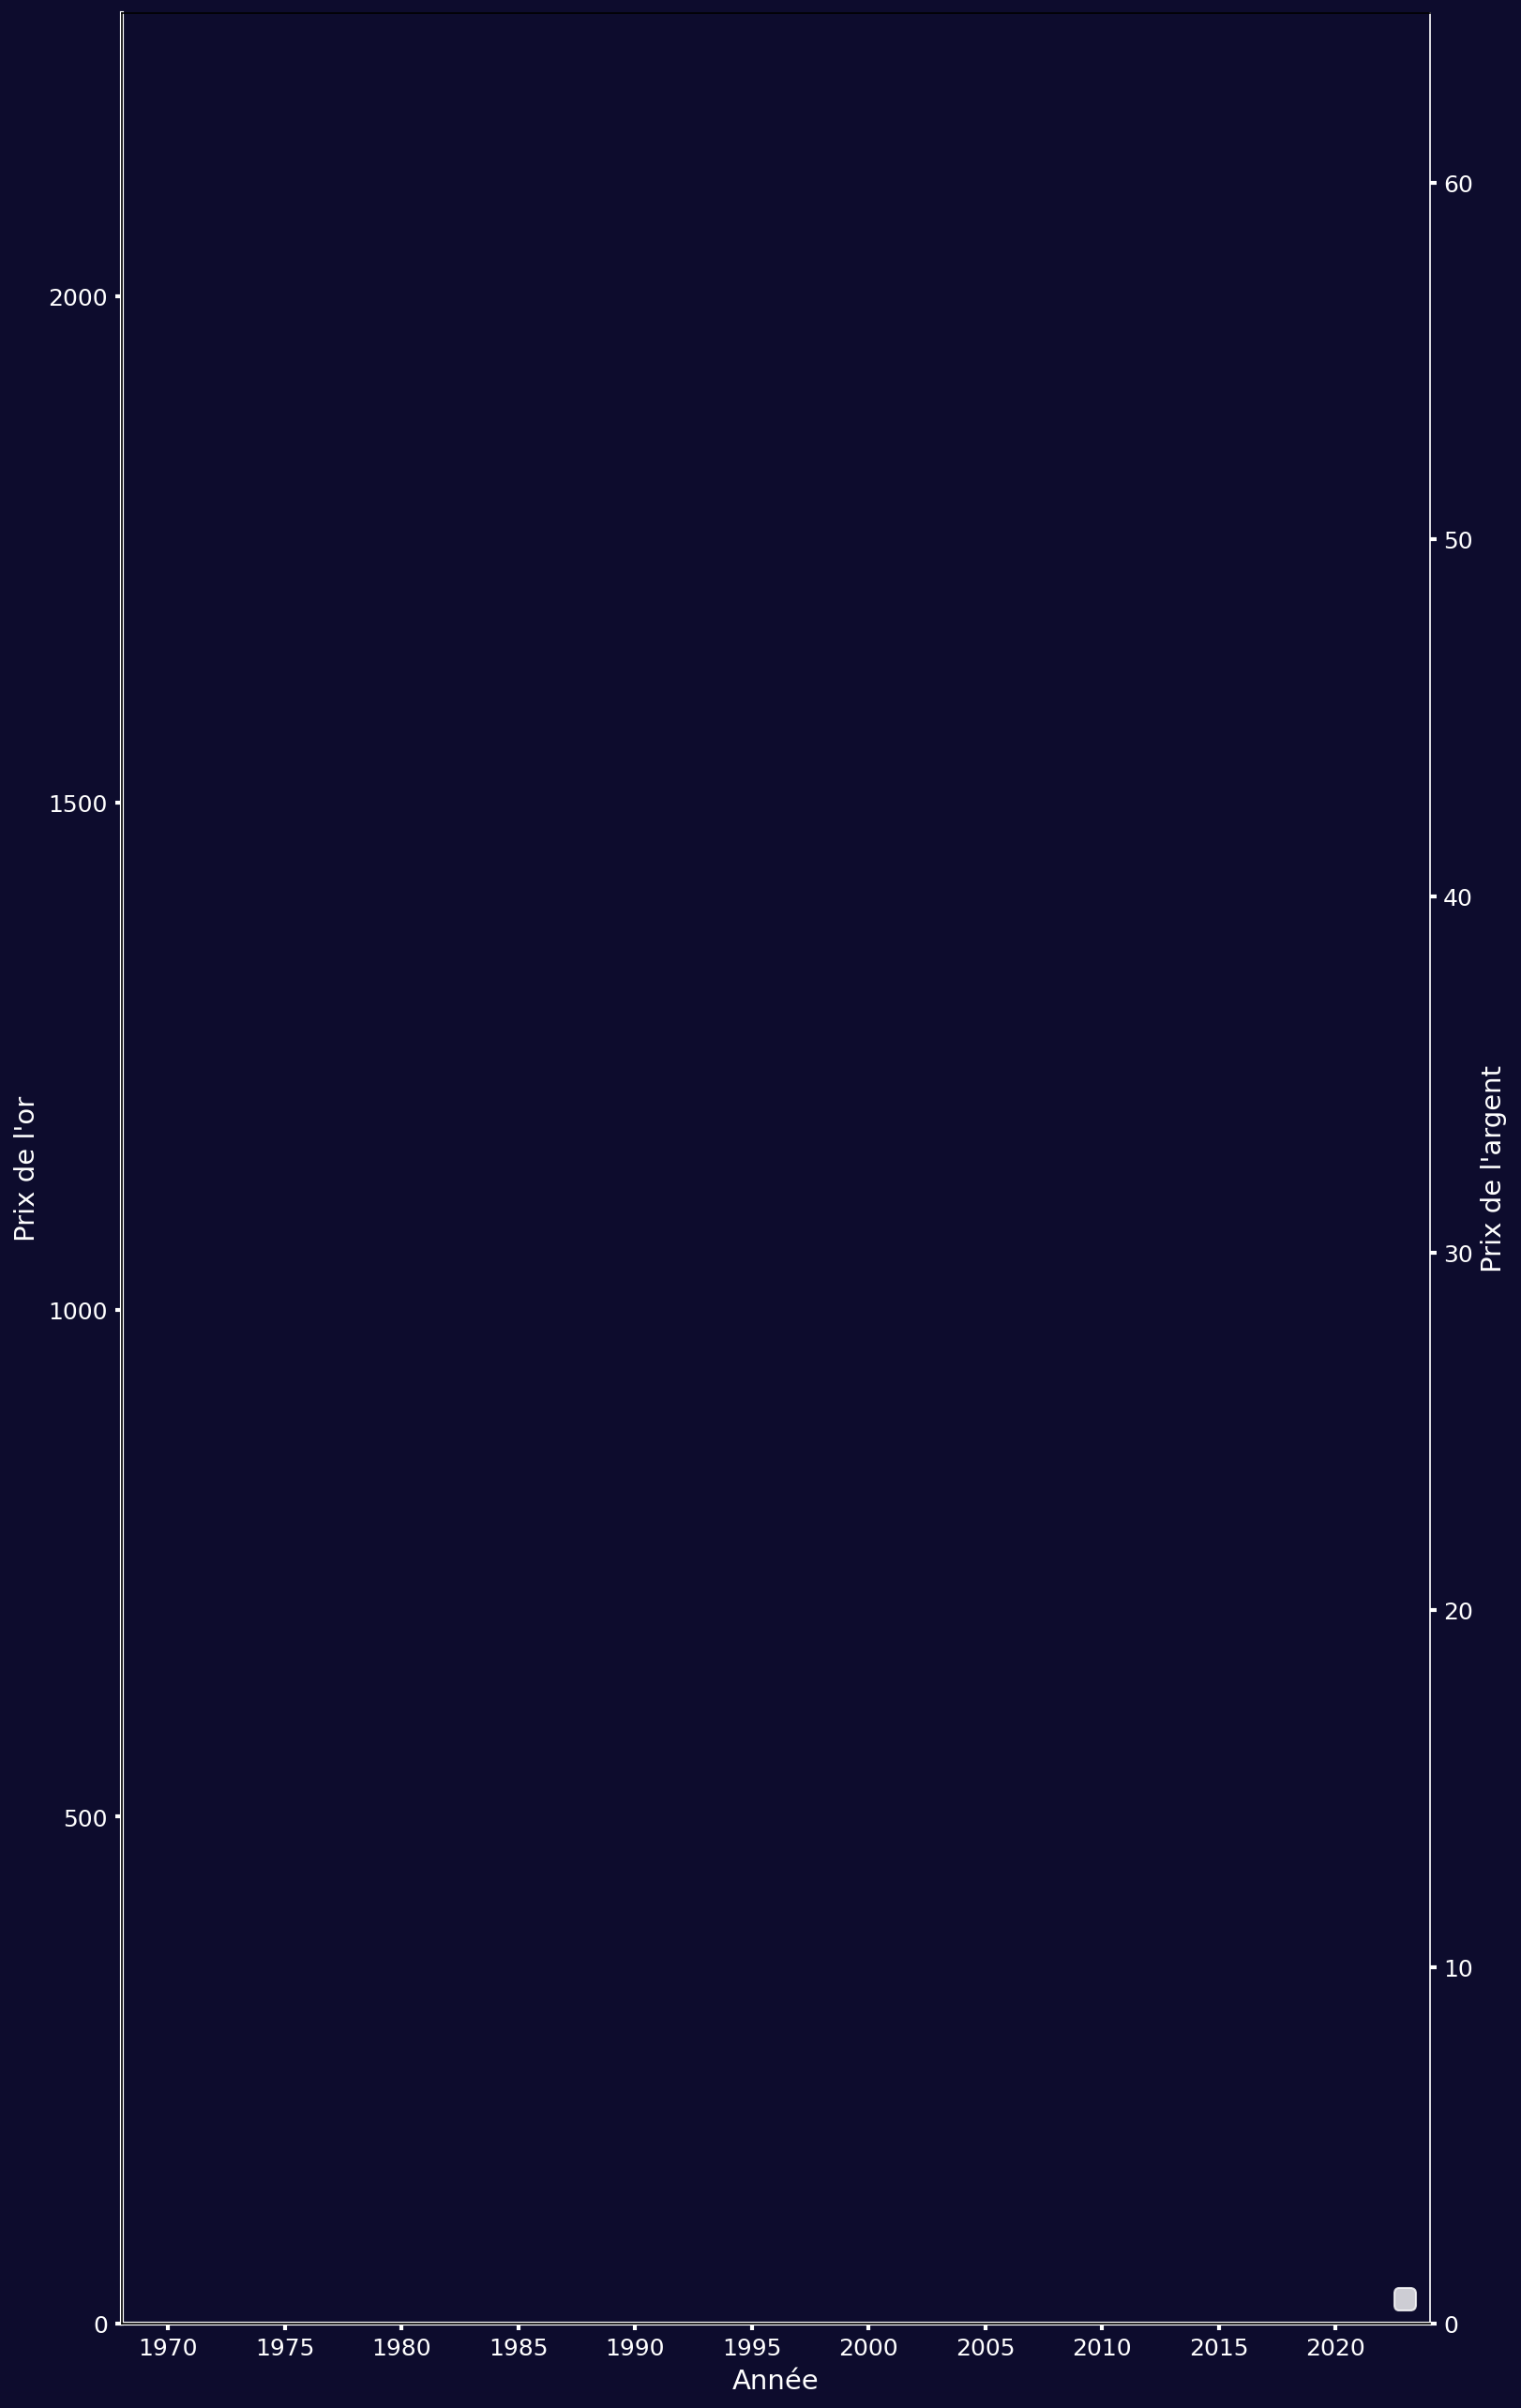

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Supposons que df_merged est déjà défini et contient les colonnes 'date', 'price_gold', et 'price_silver'

# Convertir la colonne 'date' en format datetime si ce n'est pas déjà fait
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes 'price_gold' et 'price_silver' en float pour l'interpolation
df_merged['price_gold'] = pd.to_numeric(df_merged['price_gold'], errors='coerce')
df_merged['price_silver'] = pd.to_numeric(df_merged['price_silver'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_merged['price_gold'] = df_merged['price_gold'].interpolate()
df_merged['price_silver'] = df_merged['price_silver'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_merged.ffill(inplace=True)  # Remplir les NaN avec la dernière valeur connue
df_merged.fillna(0, inplace=True)  # Si des NaN subsistent, les remplacer par 0

# Sous-échantillonnage des données pour lisser les courbes
step = 200  # Augmenter le step pour le sous-échantillonnage
x_data_reduced = df_merged['date'][::step].values
y_data_gold_reduced = df_merged['price_gold'][::step].values
y_data_silver_reduced = df_merged['price_silver'][::step].values

# Préparation des données pour l'interpolation et l'animation
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data_reduced) - 1, total_frames)

# Assurez-vous que les dates sont bien dans le bon format
x_data_reduced = np.array([pd.Timestamp(d).value for d in x_data_reduced])
x_interp = np.interp(time_interp, np.arange(len(x_data_reduced)), x_data_reduced)
x_interp = pd.to_datetime(x_interp)

y_interp_gold = np.interp(time_interp, np.arange(len(y_data_gold_reduced)), y_data_gold_reduced)
y_interp_silver = np.interp(time_interp, np.arange(len(y_data_silver_reduced)), y_data_silver_reduced)

# Définir la période non animée au début
start_date = pd.Timestamp('1970-01-01')
initial_non_animated_years = 5  # 5 années non animées
start_date_initial = start_date
end_date_initial = start_date_initial + pd.DateOffset(years=initial_non_animated_years)
x_interp_initial = x_interp[x_interp < end_date_initial]

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Couleurs de fond et des axes
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite, enlever la bordure noire en haut
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Ajouter un second axe y pour l'argent
ax2 = ax1.twinx()

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
color_gold = 'gold'
color_silver = 'silver'

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Axe 2 (pour l'argent)
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax2.yaxis.label.set_color('white')

# Lignes de données pour l'or et l'argent, avec une épaisseur de ligne augmentée
line_gold, = ax1.plot([], [], lw=5, color=color_gold)  # Augmenter l'épaisseur de la ligne
line_silver, = ax2.plot([], [], lw=5, color=color_silver)  # Augmenter l'épaisseur de la ligne

# Initialiser l'animation
def init():
    line_gold.set_data([], [])
    line_silver.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, y_interp_gold.max() * 1.1)
    ax2.set_ylim(0, y_interp_silver.max() * 1.8)  # Augmenter l'échelle de l'axe argent
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Prix de l\'or', fontsize=14, color='white')
    ax2.set_ylabel('Prix de l\'argent', fontsize=14, color='white')

    # Ajouter un compteur de date avec une taille de texte augmentée
    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'  # Augmenter la taille du texte
    )

    # Ajouter la légende en bas à droite
    ax1.legend(['Prix de l\'or'], loc='lower right', fontsize=14, frameon=True, framealpha=1, facecolor='white')
    ax2.legend(['Prix de l\'argent'], loc='lower right', fontsize=14, frameon=True, framealpha=1, facecolor='white')

    return line_gold, line_silver, date_counter

# Fonction de mise à jour de l'animation avec dézoom progressif et annotations
def update(frame):
    # Mise à jour des données des lignes
    if frame < len(x_interp_initial):
        line_gold.set_data(x_interp_initial[:frame], y_interp_gold[:frame])
        line_silver.set_data(x_interp_initial[:frame], y_interp_silver[:frame])
    else:
        # Pour les données animées
        line_gold.set_data(x_interp[:frame], y_interp_gold[:frame])
        line_silver.set_data(x_interp[:frame], y_interp_silver[:frame])

    # Mise à jour des limites de l'axe si la séquence n'est pas vide
    if frame > 0:
        current_max_gold = np.nanmax(y_interp_gold[:frame]) * 1.1
        current_max_silver = np.nanmax(y_interp_silver[:frame]) * 1.8  # Ajuster l'échelle de l'argent
        ax1.set_ylim(0, current_max_gold)
        ax2.set_ylim(0, current_max_silver)

        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        # Suppression des annotations précédentes
        for ann in ax1.texts:
            if ann != date_counter:
                ann.remove()
        for ann in ax2.texts:
            ann.remove()

        # Ajout des annotations pour l'or
        ax1.annotate(
            f"{y_interp_gold[frame]:.2f} $", (x_interp[frame], y_interp_gold[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_gold, fontsize=24  # Doubler la taille des annotations
        )

        # Ajout des annotations pour l'argent
        ax2.annotate(
            f"{y_interp_silver[frame]:.2f} $", (x_interp[frame], y_interp_silver[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_silver, fontsize=24  # Doubler la taille des annotations
        )

        # Mettre à jour le compteur de date
        date_str = x_interp[frame].strftime('%Y')
        date_counter.set_text(date_str)

    return line_gold, line_silver, date_counter

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Sauvegarde et affichage
ani.save('gold_silver_animation.mp4', writer='ffmpeg')
HTML('<video controls src="gold_silver_animation.mp4" type="video/mp4">')


<ipython-input-18-b1c13d00e411>:126: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, current_max_gold)


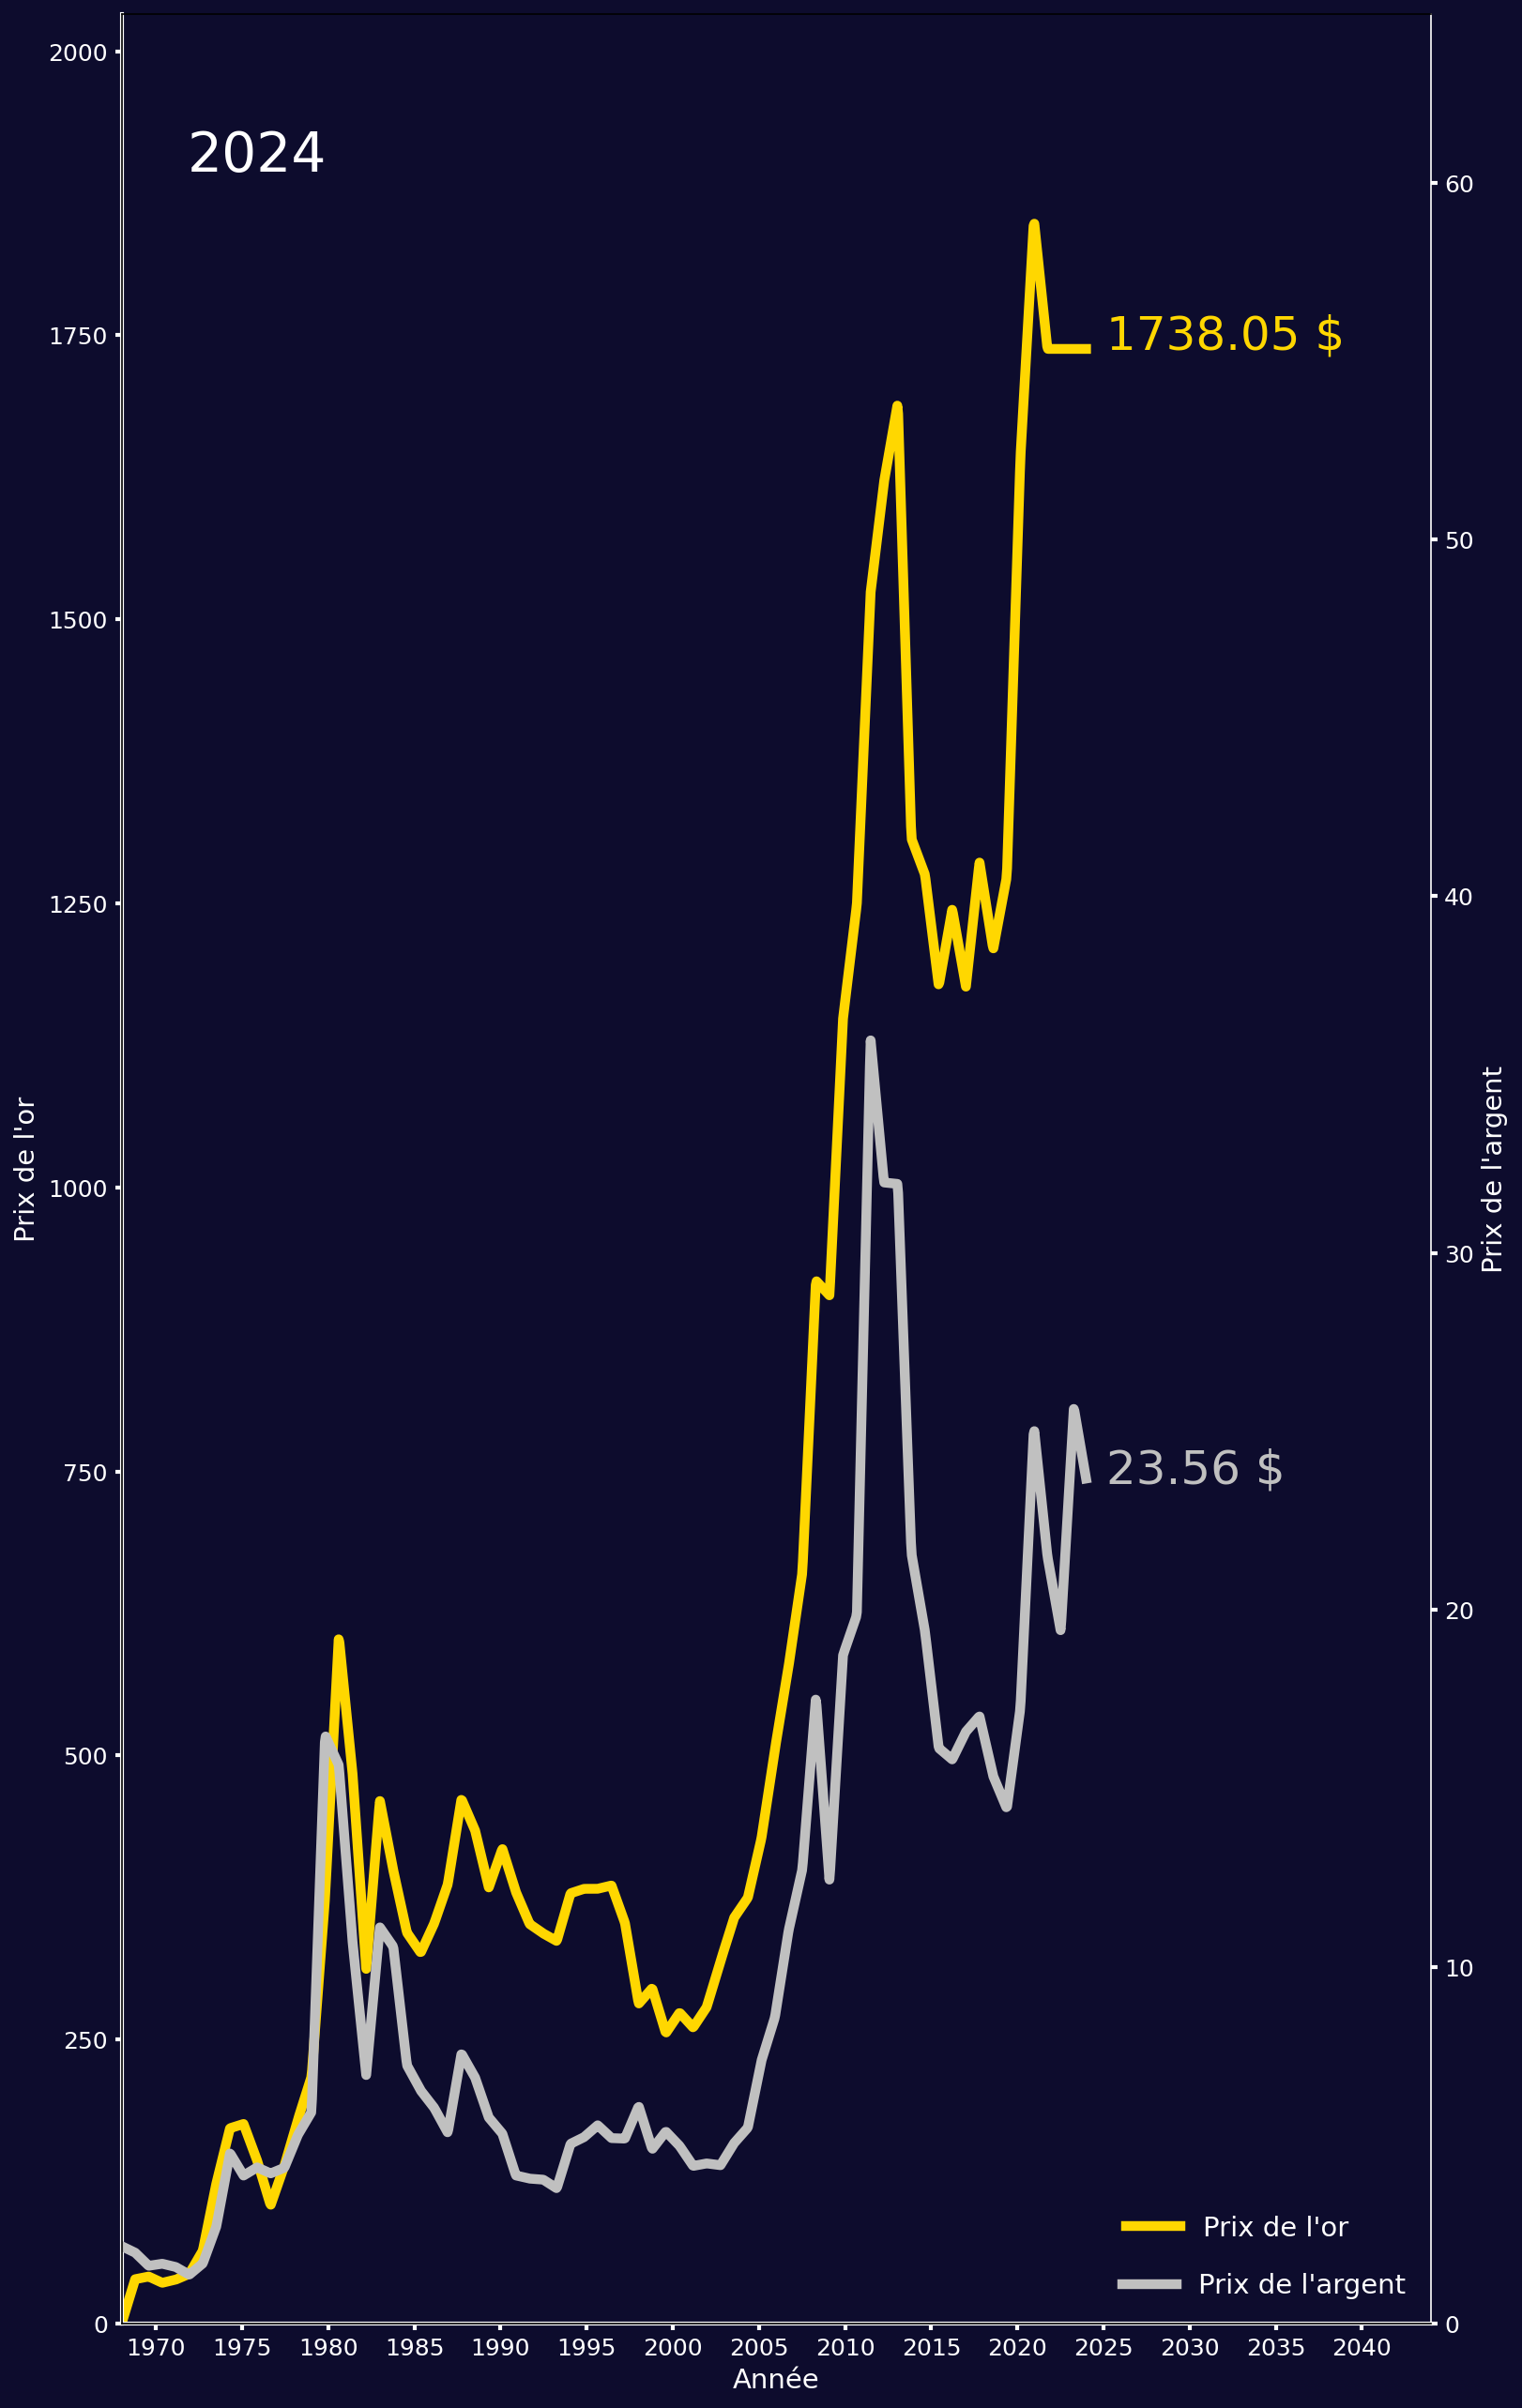

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Supposons que df_merged est déjà défini et contient les colonnes 'date', 'price_gold', et 'price_silver'

# Convertir la colonne 'date' en format datetime si ce n'est pas déjà fait
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes 'price_gold' et 'price_silver' en float pour l'interpolation
df_merged['price_gold'] = pd.to_numeric(df_merged['price_gold'], errors='coerce')
df_merged['price_silver'] = pd.to_numeric(df_merged['price_silver'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_merged['price_gold'] = df_merged['price_gold'].interpolate()
df_merged['price_silver'] = df_merged['price_silver'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_merged.ffill(inplace=True)  # Remplir les NaN avec la dernière valeur connue
df_merged.fillna(0, inplace=True)  # Si des NaN subsistent, les remplacer par 0

# Sous-échantillonnage des données pour lisser les courbes
step = 200  # Augmenter le step pour le sous-échantillonnage
x_data_reduced = df_merged['date'][::step].values
y_data_gold_reduced = df_merged['price_gold'][::step].values
y_data_silver_reduced = df_merged['price_silver'][::step].values

# Préparation des données pour l'interpolation et l'animation
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data_reduced) - 1, total_frames)

# Assurez-vous que les dates sont bien dans le bon format
x_data_reduced = np.array([pd.Timestamp(d).value for d in x_data_reduced])
x_interp = np.interp(time_interp, np.arange(len(x_data_reduced)), x_data_reduced)
x_interp = pd.to_datetime(x_interp)

y_interp_gold = np.interp(time_interp, np.arange(len(y_data_gold_reduced)), y_data_gold_reduced)
y_interp_silver = np.interp(time_interp, np.arange(len(y_data_silver_reduced)), y_data_silver_reduced)

# Définir la période non animée au début
start_date = pd.Timestamp('1970-01-01')
initial_non_animated_years = 5  # 5 années non animées
start_date_initial = start_date
end_date_initial = start_date_initial + pd.DateOffset(years=initial_non_animated_years)
x_interp_initial = x_interp[x_interp < end_date_initial]

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Couleurs de fond et des axes
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite, enlever la bordure noire en haut
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)

# Ajouter un second axe y pour l'argent
ax2 = ax1.twinx()

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
color_gold = 'gold'
color_silver = 'silver'

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')

# Axe 2 (pour l'argent)
ax2.spines['right'].set_color('white')
ax2.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax2.yaxis.label.set_color('white')

# Lignes de données pour l'or et l'argent, avec une épaisseur de ligne augmentée
line_gold, = ax1.plot([], [], lw=5, color=color_gold)  # Augmenter l'épaisseur de la ligne
line_silver, = ax2.plot([], [], lw=5, color=color_silver)  # Augmenter l'épaisseur de la ligne

# Initialiser l'animation
def init():
    line_gold.set_data([], [])
    line_silver.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, y_interp_gold.max() * 1.1)
    ax2.set_ylim(0, y_interp_silver.max() * 1.8)  # Augmenter l'échelle de l'axe argent
    ax1.set_xlabel('Année', fontsize=14)
    ax1.set_ylabel('Prix de l\'or', fontsize=14, color='white')
    ax2.set_ylabel('Prix de l\'argent', fontsize=14, color='white')

    # Ajouter un compteur de date avec une taille de texte augmentée
    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    return line_gold, line_silver, date_counter

# Fonction de mise à jour de l'animation avec dézoom progressif et annotations
def update(frame):
    if frame < len(x_interp_initial):
        line_gold.set_data(x_interp_initial[:frame], y_interp_gold[:frame])
        line_silver.set_data(x_interp_initial[:frame], y_interp_silver[:frame])
    else:
        line_gold.set_data(x_interp[:frame], y_interp_gold[:frame])
        line_silver.set_data(x_interp[:frame], y_interp_silver[:frame])

    if frame > 0:
        current_max_gold = np.nanmax(y_interp_gold[:frame]) * 1.1
        current_max_silver = np.nanmax(y_interp_silver[:frame]) * 1.8
        ax1.set_ylim(0, current_max_gold)
        ax2.set_ylim(0, current_max_silver)

        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            if ann != date_counter:
                ann.remove()
        for ann in ax2.texts:
            ann.remove()

        ax1.annotate(
            f"{y_interp_gold[frame]:.2f} $", (x_interp[frame], y_interp_gold[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_gold, fontsize=24
        )

        ax2.annotate(
            f"{y_interp_silver[frame]:.2f} $", (x_interp[frame], y_interp_silver[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_silver, fontsize=24
        )

        date_str = x_interp[frame].strftime('%Y')
        date_counter.set_text(date_str)

    return line_gold, line_silver, date_counter

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Ajouter les légendes après la création des lignes, hors des fonctions init/update
ax1.legend(['Prix de l\'or'], loc='lower right', fontsize=14, frameon=False, labelcolor='white', bbox_to_anchor=(0.956, 0.025))
ax2.legend(['Prix de l\'argent'], loc='lower right', fontsize=14, frameon=False, labelcolor='white', bbox_to_anchor=(1.0, 0))

# Sauvegarde et affichage
ani.save('gold_silver_animation.mp4', writer='ffmpeg')
HTML('<video controls src="gold_silver_animation.mp4" type="video/mp4">')



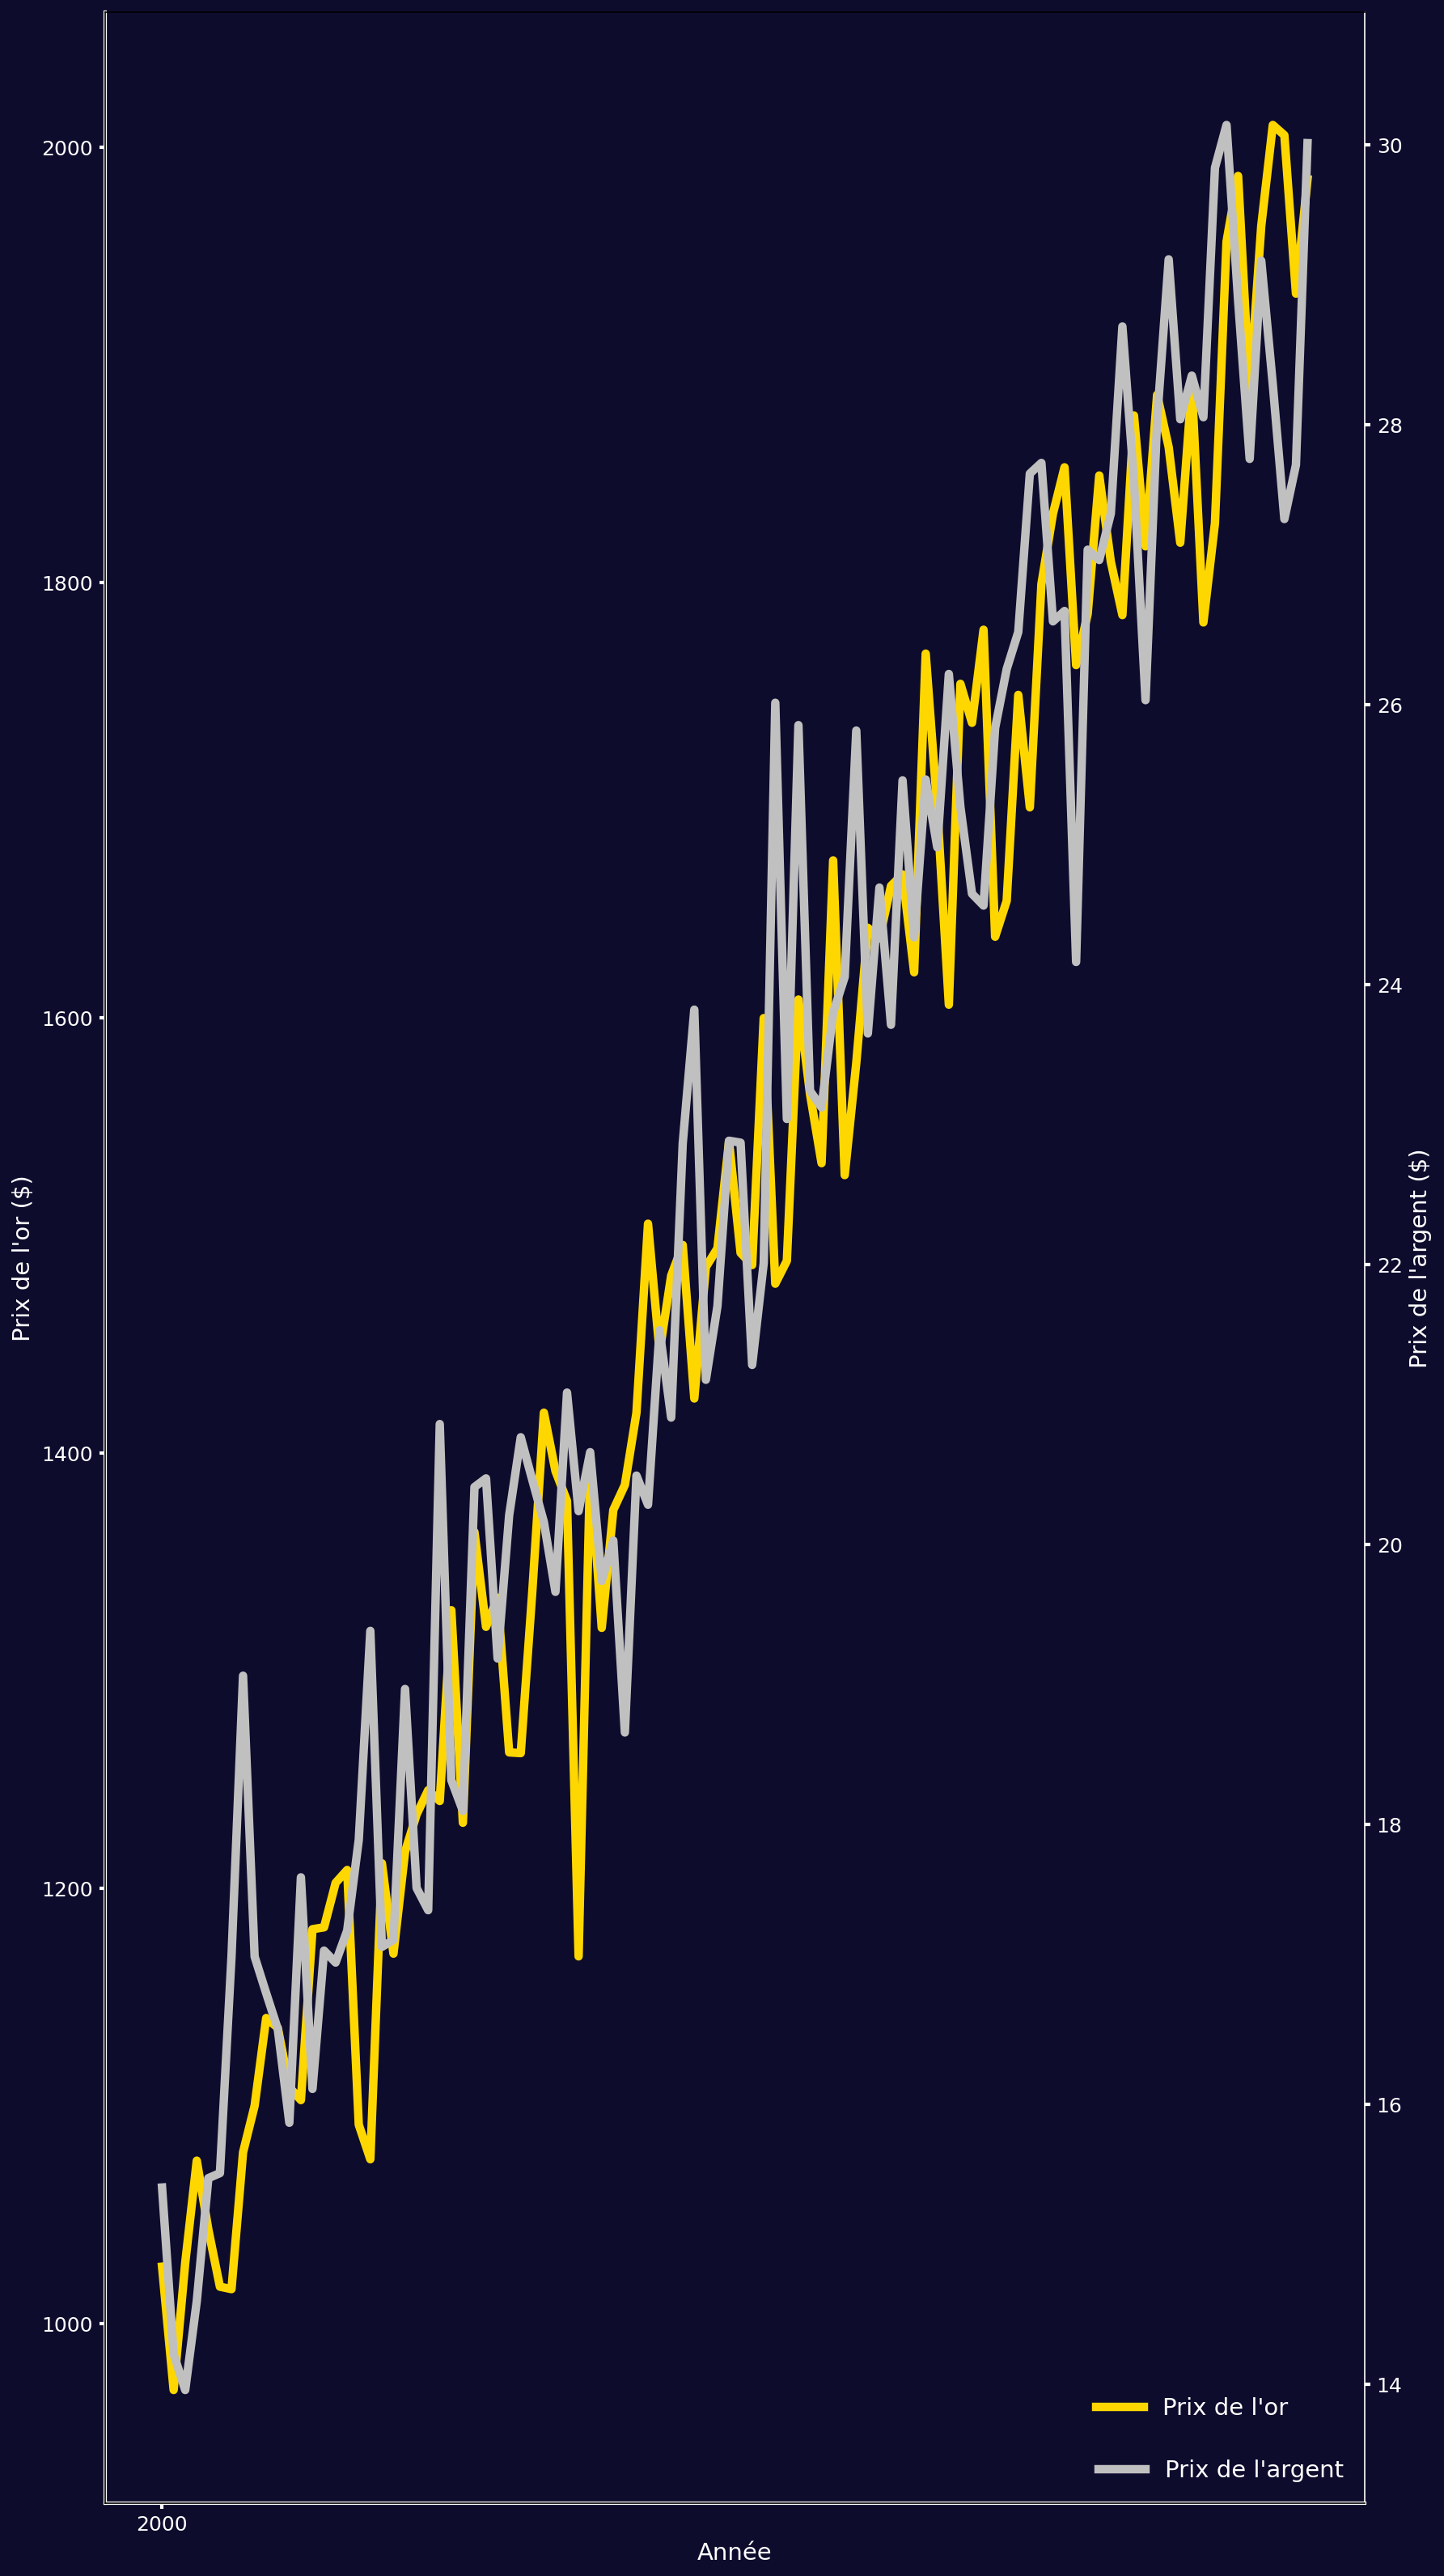

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Création de la DataFrame de test
date_range = pd.date_range(start='2000-01-01', periods=1000, freq='D')
price_gold = np.linspace(1000, 2000, 1000) + np.random.normal(0, 50, 1000)  # Simulation prix or
price_silver = np.linspace(15, 30, 1000) + np.random.normal(0, 1, 1000)  # Simulation prix argent

# DataFrame factice avec les colonnes 'date', 'price_gold', 'price_silver'
df_test = pd.DataFrame({'date': date_range, 'price_gold': price_gold, 'price_silver': price_silver})

# Sous-échantillonnage pour lisser les courbes
step = 10  # Réduire le nombre de points pour visualisation
x_data_reduced = df_test['date'][::step].values
y_data_gold_reduced = df_test['price_gold'][::step].values
y_data_silver_reduced = df_test['price_silver'][::step].values

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Couleurs de fond et des axes
fig.patch.set_facecolor('#0D0C2D')
ax1.set_facecolor('#0D0C2D')

# Retirer les bordures supérieure et droite, enlever la bordure noire en haut
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')

# Second axe y pour l'argent
ax2 = ax1.twinx()
ax2.spines['right'].set_color('white')

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
color_gold = 'gold'
color_silver = 'silver'

# Tracer les lignes de données
ax1.plot(x_data_reduced, y_data_gold_reduced, color=color_gold, lw=5, label="Prix de l'or")
ax2.plot(x_data_reduced, y_data_silver_reduced, color=color_silver, lw=5, label="Prix de l'argent")

# Configurer les axes et leurs étiquettes en blanc, avec une épaisseur supplémentaire
ax1.tick_params(axis='x', colors='white', labelsize=12, width=2)
ax1.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.set_xlabel('Année', fontsize=14, color='white')
ax1.set_ylabel('Prix de l\'or ($)', fontsize=14, color='white')

ax2.tick_params(axis='y', colors='white', labelsize=12, width=2)
ax2.yaxis.label.set_color('white')
ax2.set_ylabel('Prix de l\'argent ($)', fontsize=14, color='white')

# Ajouter les légendes
ax1.legend(loc='lower right', fontsize=14, frameon=False, labelcolor='white', bbox_to_anchor=(0.956, 0.025))
ax2.legend(loc='lower right', fontsize=14, frameon=False, labelcolor='white', bbox_to_anchor=(1.0, 0))

# Afficher le graphique
plt.tight_layout()
plt.show()


<ipython-input-14-2560c4be42dc>:141: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(0, current_max_gold)


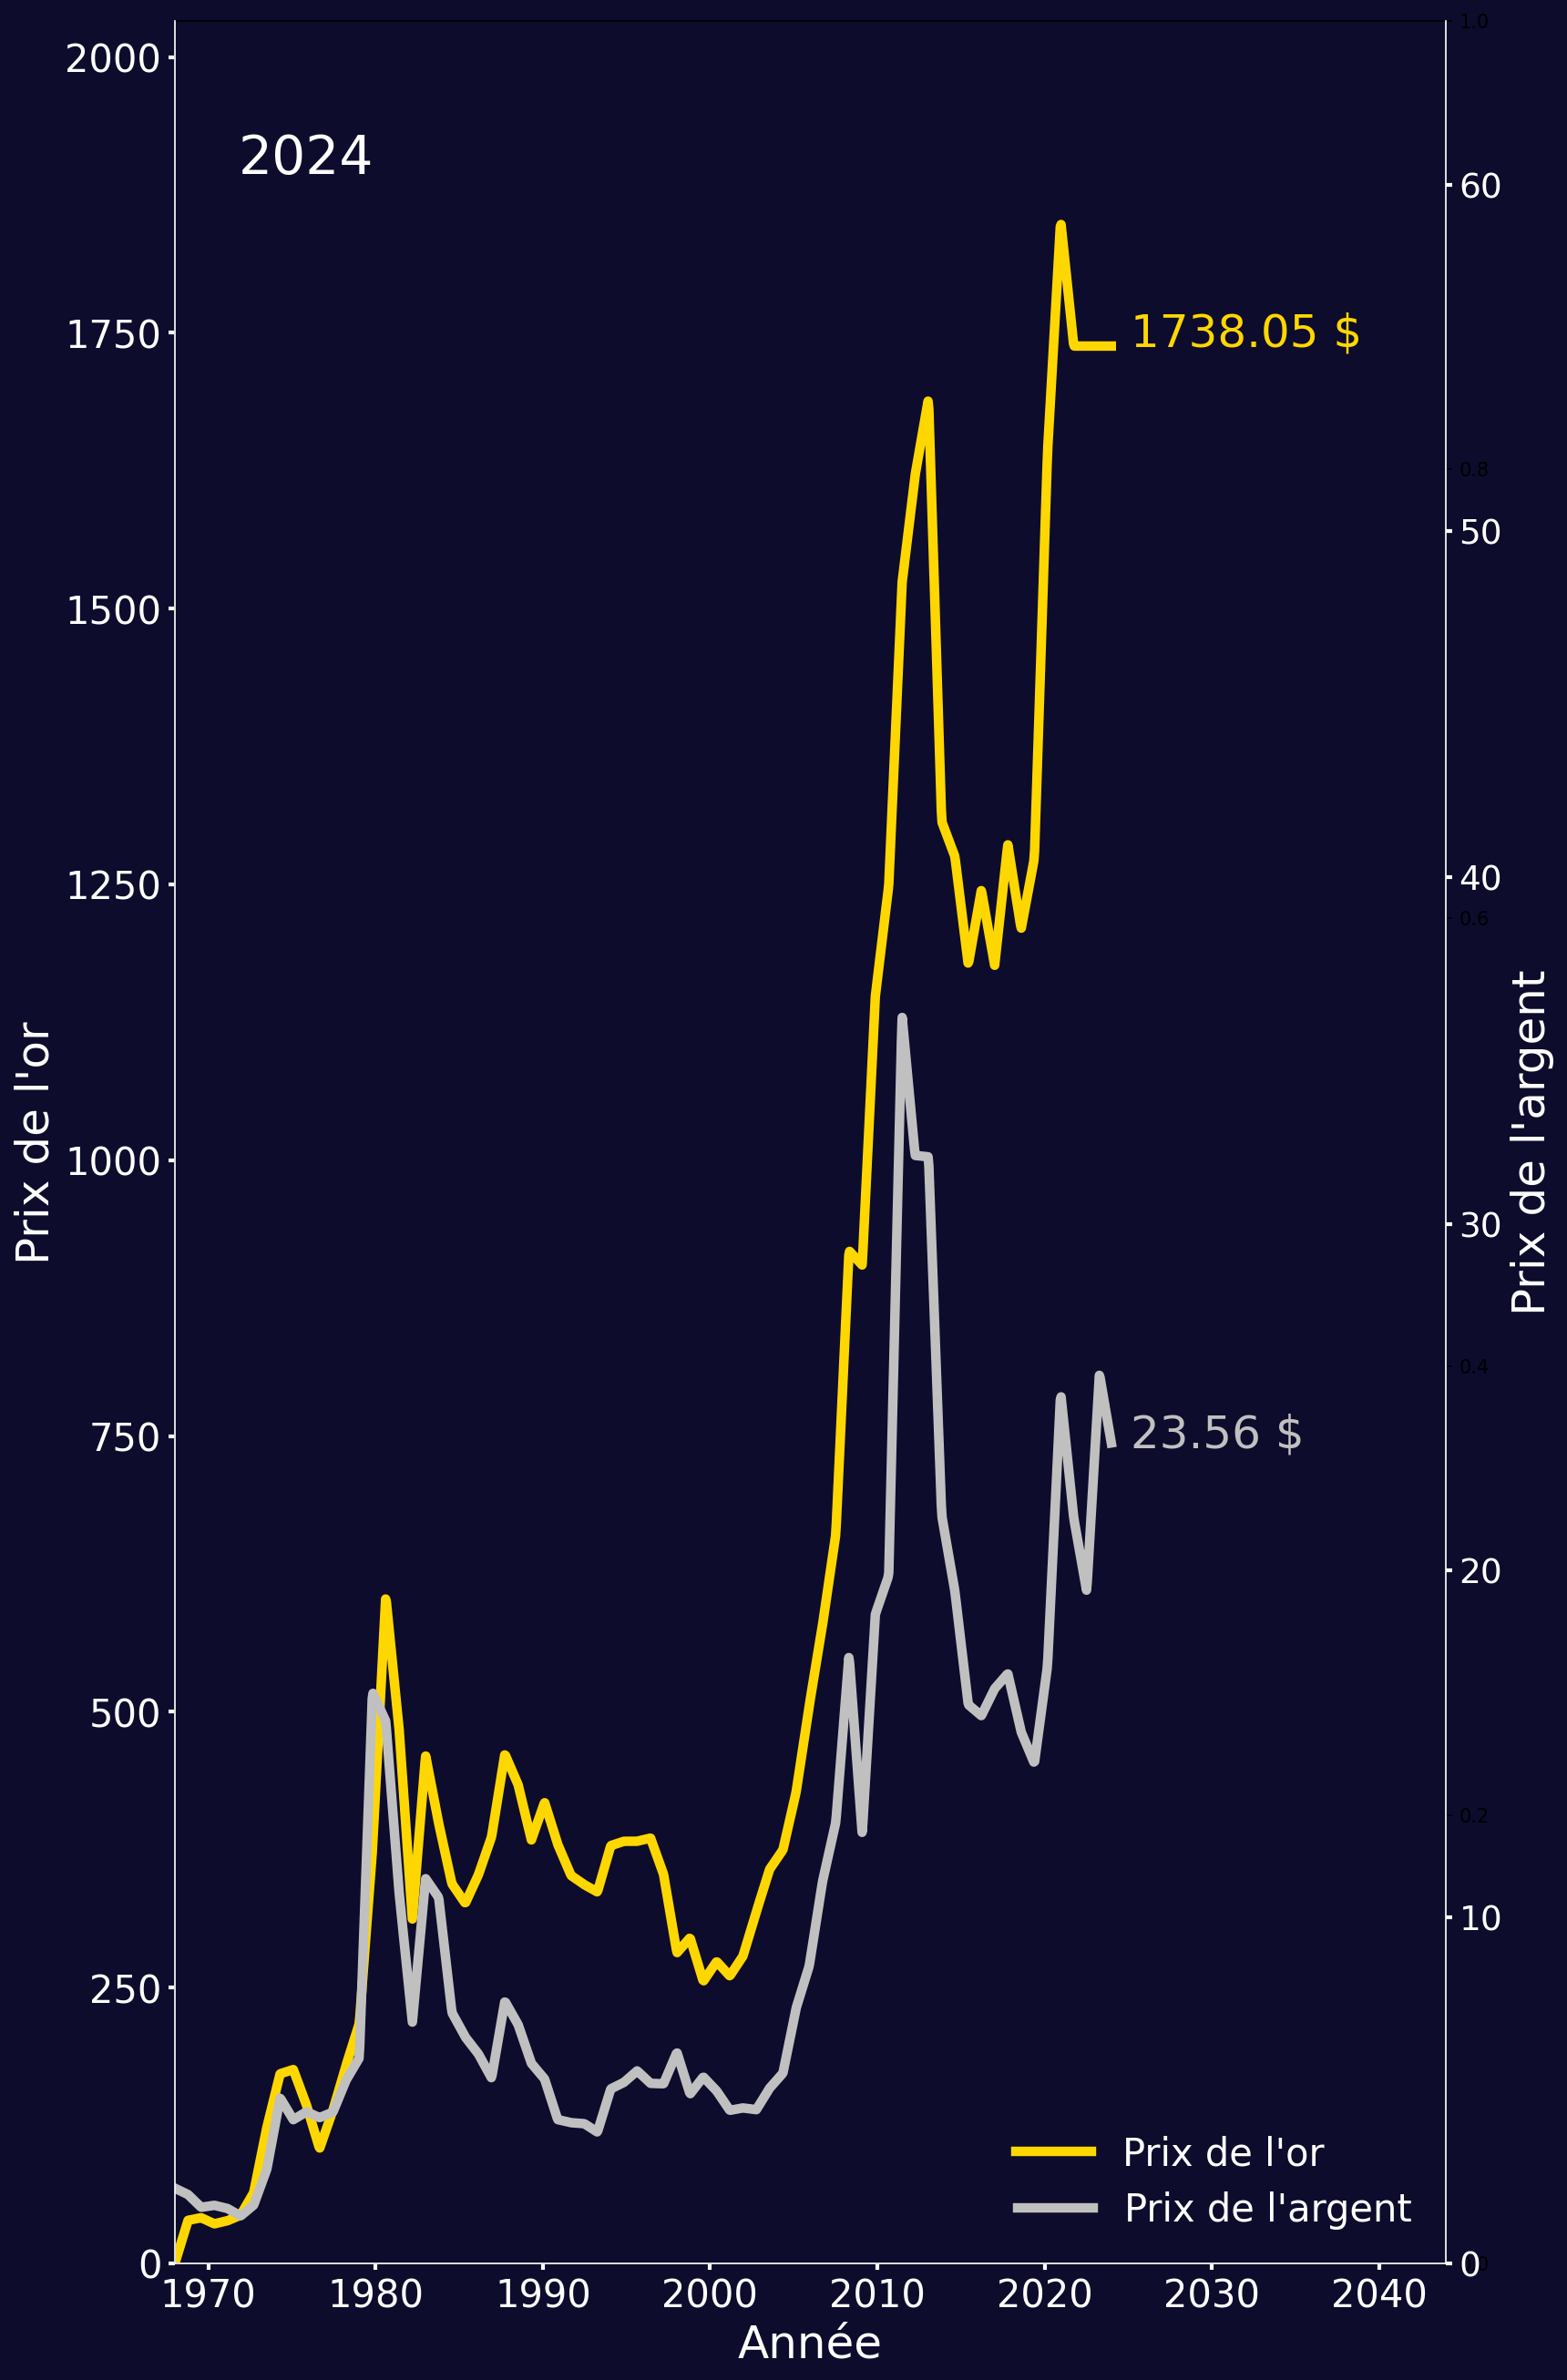

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates

# Supposons que df_merged est déjà défini et contient les colonnes 'date', 'price_gold', et 'price_silver'

# Convertir la colonne 'date' en format datetime si ce n'est pas déjà fait
df_merged['date'] = pd.to_datetime(df_merged['date'], errors='coerce')

# Remplacer les valeurs infinies par NaN pour les gérer correctement
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir les colonnes 'price_gold' et 'price_silver' en float pour l'interpolation
df_merged['price_gold'] = pd.to_numeric(df_merged['price_gold'], errors='coerce')
df_merged['price_silver'] = pd.to_numeric(df_merged['price_silver'], errors='coerce')

# Interpolation pour combler les valeurs manquantes après fusion
df_merged['price_gold'] = df_merged['price_gold'].interpolate()
df_merged['price_silver'] = df_merged['price_silver'].interpolate()

# Vérifier s'il reste des NaN après l'interpolation et les remplacer par la valeur précédente ou 0
df_merged.ffill(inplace=True)  # Remplir les NaN avec la dernière valeur connue
df_merged.fillna(0, inplace=True)  # Si des NaN subsistent, les remplacer par 0

# Sous-échantillonnage des données pour lisser les courbes
step = 200  # Augmenter le step pour le sous-échantillonnage
x_data_reduced = df_merged['date'][::step].values
y_data_gold_reduced = df_merged['price_gold'][::step].values
y_data_silver_reduced = df_merged['price_silver'][::step].values

# Préparation des données pour l'interpolation et l'animation
total_frames = 20 * 60  # 20 secondes à 60 images par seconde
time_interp = np.linspace(0, len(x_data_reduced) - 1, total_frames)

# Assurez-vous que les dates sont bien dans le bon format
x_data_reduced = np.array([pd.Timestamp(d).value for d in x_data_reduced])
x_interp = np.interp(time_interp, np.arange(len(x_data_reduced)), x_data_reduced)
x_interp = pd.to_datetime(x_interp)

y_interp_gold = np.interp(time_interp, np.arange(len(y_data_gold_reduced)), y_data_gold_reduced)
y_interp_silver = np.interp(time_interp, np.arange(len(y_data_silver_reduced)), y_data_silver_reduced)

# Définir la période non animée au début
start_date = pd.Timestamp('1970-01-01')
initial_non_animated_years = 5  # 5 années non animées
start_date_initial = start_date
end_date_initial = start_date_initial + pd.DateOffset(years=initial_non_animated_years)
x_interp_initial = x_interp[x_interp < end_date_initial]

# Créer la figure et les axes avec le format spécifique
fig, ax1 = plt.subplots(figsize=(12, 21.33), dpi=150)

# Couleurs de fond et des axes
fig.patch.set_facecolor('#0D0C2D')  # Fond de la figure
ax1.set_facecolor('#0D0C2D')  # Fond des axes


# Ajouter un second axe y pour l'argent
ax2 = ax1.twinx()

# Configurer l'axe des x pour afficher les années tous les 5 ans
ax1.xaxis.set_major_locator(mdates.YearLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs des lignes
color_gold = 'gold'
color_silver = 'silver'

# Couleurs de fond et des axes
fig.patch.set_facecolor('#0D0C2D')  # Fond de la figure
ax1.set_facecolor('#0D0C2D')  # Fond des axes

# Désactiver uniquement la bordure supérieure (spine du haut) sur ax1 et ax2
ax1.spines['top'].set_visible(False)    # Désactiver la bordure du haut pour ax1
ax2 = ax1.twinx()                       # Créer l'axe secondaire pour l'argent
ax2.spines['top'].set_visible(False)    # Désactiver la bordure du haut pour ax2

# Garder toutes les autres spines (gauche, droite, bas) et les mettre en blanc
ax1.spines['left'].set_color('white')   # Bordure gauche en blanc pour ax1
ax1.spines['bottom'].set_color('white') # Bordure bas en blanc pour ax1
ax1.spines['right'].set_color('white')  # Bordure droite en blanc pour ax1

ax2.spines['right'].set_color('white')  # Bordure droite en blanc pour ax2
ax2.spines['left'].set_color('white')   # Bordure gauche en blanc pour ax2
ax2.spines['bottom'].set_color('white') # Bordure bas en blanc pour ax2

# Mettre les ticks et labels d'axes en blanc avec un labelsize augmenté à 18
ax1.tick_params(axis='x', colors='white', labelsize=20, width=2)  # Axe X en blanc
ax1.tick_params(axis='y', colors='white', labelsize=20, width=2)  # Axe Y en blanc
ax1.yaxis.label.set_color('white')  # Label axe Y en blanc
ax1.xaxis.label.set_color('white')  # Label axe X en blanc

# Configuration de l'axe secondaire (argent) avec ticks et labels en blanc
ax2.tick_params(axis='y', colors='white', labelsize=18, width=2)  # Axe Y2 en blanc
ax2.yaxis.label.set_color('white')  # Label axe Y2 en blanc

# S'assurer que les données sont bien affichées sur les deux axes
line_gold, = ax1.plot([], [], lw=5, color='gold', label='Prix de l\'or')  # Lignes de données or
line_silver, = ax2.plot([], [], lw=5, color='silver', label='Prix de l\'argent')  # Lignes de données argent


# Lignes de données pour l'or et l'argent, avec une épaisseur de ligne augmentée
line_gold, = ax1.plot([], [], lw=5, color=color_gold)  # Augmenter l'épaisseur de la ligne
line_silver, = ax2.plot([], [], lw=5, color=color_silver)  # Augmenter l'épaisseur de la ligne

# Initialiser l'animation
def init():
    line_gold.set_data([], [])
    line_silver.set_data([], [])
    ax1.set_xlim(x_interp.min(), x_interp.max())
    ax1.set_ylim(0, y_interp_gold.max() * 1.1)
    ax2.set_ylim(0, y_interp_silver.max() * 1.8)  # Augmenter l'échelle de l'axe argent
    ax1.set_xlabel('Année', fontsize=24)
    ax1.set_ylabel('Prix de l\'or', fontsize=24, color='white')
    ax2.set_ylabel('Prix de l\'argent', fontsize=24, color='white')

    # Ajouter un compteur de date avec une taille de texte augmentée
    global date_counter
    date_counter = ax1.text(
        0.05, 0.95, '', transform=ax1.transAxes,
        fontsize=28, color='white', verticalalignment='top'
    )

    return line_gold, line_silver, date_counter

# Fonction de mise à jour de l'animation avec dézoom progressif et annotations
def update(frame):
    if frame < len(x_interp_initial):
        line_gold.set_data(x_interp_initial[:frame], y_interp_gold[:frame])
        line_silver.set_data(x_interp_initial[:frame], y_interp_silver[:frame])
    else:
        line_gold.set_data(x_interp[:frame], y_interp_gold[:frame])
        line_silver.set_data(x_interp[:frame], y_interp_silver[:frame])

    if frame > 0:
        current_max_gold = np.nanmax(y_interp_gold[:frame]) * 1.1
        current_max_silver = np.nanmax(y_interp_silver[:frame]) * 1.8
        ax1.set_ylim(0, current_max_gold)
        ax2.set_ylim(0, current_max_silver)

        range_x = x_interp.max() - x_interp.min()
        ax1.set_xlim(x_interp[0], x_interp[0] + range_x * (frame / total_frames) + np.timedelta64(3652, 'D') * 2)

        for ann in ax1.texts:
            if ann != date_counter:
                ann.remove()
        for ann in ax2.texts:
            ann.remove()

        ax1.annotate(
            f"{y_interp_gold[frame]:.2f} $", (x_interp[frame], y_interp_gold[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_gold, fontsize=24
        )

        ax2.annotate(
            f"{y_interp_silver[frame]:.2f} $", (x_interp[frame], y_interp_silver[frame]),
            textcoords="offset points", xytext=(10, 0), ha='left',
            color=color_silver, fontsize=24
        )

        date_str = x_interp[frame].strftime('%Y')
        date_counter.set_text(date_str)

    return line_gold, line_silver, date_counter

# Créer l'animation avec 60 images par seconde
ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=1000/60, repeat=False)

# Ajouter les légendes après la création des lignes, hors des fonctions init/update
ax1.legend(['Prix de l\'or'], loc='lower right', fontsize=20, frameon=False, labelcolor='white', bbox_to_anchor=(0.931, 0.025))
ax2.legend(['Prix de l\'argent'], loc='lower right', fontsize=20, frameon=False, labelcolor='white', bbox_to_anchor=(1.0, 0))

# Sauvegarde et affichage
ani.save('gold_silver_animation.mp4', writer='ffmpeg')
HTML('<video controls src="gold_silver_animation.mp4" type="video/mp4">')
